In [0]:
dbutils.fs.ls("/FileStore/tables/clinicaltrial_2023")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714523097000)]

In [0]:
dfrdd = sc.textFile("/FileStore/tables/clinicaltrial_2023")
dfrdd.take(2)

Out[2]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
dfrdd1 =dfrdd.map(lambda line: line.replace(',,', ''))
dfrdd1.take(2)

Out[3]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion"',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",']

In [0]:
dfrdd2=dfrdd1.map(lambda line: line.replace('"', ''))
dfrdd2.take(3)

Out[4]: ['Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion',
 "NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28,",
 "NCT05992571\tOral Ketone Monoester Supplementation and Resting-state Brain Connectivity\t\tRECRUITING\tCerebrovascular Function|Cognition\tOTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB\tMcMaster University\tAlzheimer's Society of Brant, Haldimand 

In [0]:
dfrdd3=dfrdd2.map(lambda x: x.split('\t'))

In [0]:
def adjust_row_length(row, length):
    return row + [None] * (length - len(row))
    
rddNew = dfrdd3.map(lambda row: adjust_row_length(row, 14))

In [0]:
from pyspark.sql.types import *
mySchema = StructType ([
    StructField("Id", StringType()) ,
    StructField("Study Title", StringType()),    
    StructField("Acronym", StringType()) ,
    StructField("Status", StringType()) ,
    StructField("Conditions", StringType()), 
    StructField("Interventions", StringType()) ,
    StructField("Sponsor", StringType()) ,
    StructField("Collaborators", StringType()) ,
    StructField("Enrollment", StringType()) ,
    StructField("Funder Type", StringType()) ,
    StructField("Type", StringType()) ,
    StructField("Study Design", StringType()) ,
    StructField("Start", StringType()),
    StructField("Completion",StringType())])

df = spark.createDataFrame(rddNew, mySchema)
df.show()

+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+-----------+
|         Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start| Completion|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+-----------+
|         Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start| Completion|
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Healt

In [0]:
header = df.first()
filtered_rdd = df.rdd.filter(lambda line: line != header)
df1 = spark.createDataFrame(filtered_rdd, mySchema)

In [0]:
#Question 1 DF implementation
from pyspark.sql.functions import col
distinct_study_titles_count = df1.select("Study Title").filter(col("Study Title").isNotNull()).distinct().count()

print("Distinct study titles count:", distinct_study_titles_count)

Distinct study titles count: 481102


In [0]:
#Question 2 DF implementation
from pyspark.sql.functions import desc

filtered_df = df1.filter(col("Type") != "Type")

type_frequencies = filtered_df.groupBy("Type").count()

ordered_type_frequencies = type_frequencies.orderBy(desc("count"))

ordered_type_frequencies.show(truncate=False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
|               |889   |
+---------------+------+



In [0]:
#Question 3 DF implementation
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split
spark = SparkSession.builder.appName("conditioncount").getOrCreate()
column_name = "Conditions"
condition_frequencies = df.withColumn(column_name, explode(split(col(column_name), "\\|"))) \
    .groupBy(column_name).count().orderBy("count", ascending=False)
print("Top 5 Conditions with Frequencies:")
condition_frequencies.show(5, False)

Top 5 Conditions with Frequencies:
+-------------+-----+
|Conditions   |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4072 |
|Hypertension |4020 |
+-------------+-----+
only showing top 5 rows



In [0]:
from pyspark.sql import SparkSession 
pharma_df = spark.read.csv("/FileStore/tables/pharma",header=True,inferSchema=True)
pharma_df.show()

+--------------------+--------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+---------------+-----------------------------+------------------+--------------+------------+--------------------+-----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|      Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    C

In [0]:
#Question 4 Dataframe implementation
from pyspark.sql import functions as F
spark = SparkSession.builder.appName("example").getOrCreate()
filtered_df = df.join(pharma_df, df['sponsor'] == pharma_df['Parent_Company'], 'left_anti')
result_df = filtered_df.groupBy('sponsor').agg(F.count('study Title').alias('study_count'))
result_df = result_df.orderBy(F.desc('study_count'))
result_df.show(10)

+--------------------+-----------+
|             sponsor|study_count|
+--------------------+-----------+
|National Cancer I...|       3410|
|   Assiut University|       3335|
|    Cairo University|       3023|
|Assistance Publiq...|       2951|
|         Mayo Clinic|       2766|
|M.D. Anderson Can...|       2702|
|Novartis Pharmace...|       2393|
|National Institut...|       2340|
|Massachusetts Gen...|       2263|
|National Taiwan U...|       2181|
+--------------------+-----------+
only showing top 10 rows



Completed Studies In 2023-01 : 1494
Completed Studies In 2023-02 : 1272
Completed Studies In 2023-03 : 1552
Completed Studies In 2023-04 : 1324
Completed Studies In 2023-05 : 1415
Completed Studies In 2023-06 : 1619
Completed Studies In 2023-07 : 1360
Completed Studies In 2023-08 : 1230
Completed Studies In 2023-09 : 1152
Completed Studies In 2023-10 : 1058
Completed Studies In 2023-11 : 909
Completed Studies In 2023-12 : 1082
[1494, 1272, 1552, 1324, 1415, 1619, 1360, 1230, 1152, 1058, 909, 1082]


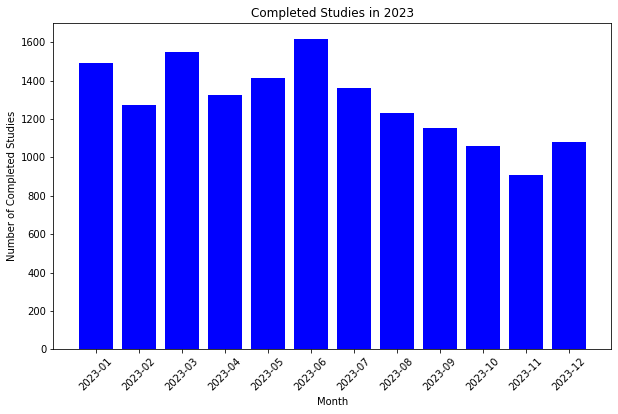

In [0]:
#Question 5 DF implementation
import matplotlib.pyplot as plt
month_2023_counts = []

for month in range(1, 13):
    month_str = "2023-{0:02d}".format(month)
    month_values = (df1.filter((col("Status") == "COMPLETED") & (col("Completion").contains(month_str))).count())
    month_2023_counts.append(month_values)
    print("Completed Studies In", month_str, ":", month_values)

months = ["2023-{0:02d}".format(month) for month in range(1, 13)]

print(month_2023_counts)

plt.figure(figsize=(10, 6))
plt.bar(months, month_2023_counts, color='b')
plt.title('Completed Studies in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.show()


In [0]:
#Query 2 for further analysis
sponsors_nih_df = df1.filter(df1['Funder Type'] == 'NIH')

sponsor_names_df = sponsors_nih_df.select('Sponsor')

sponsor_names_list = [row.Sponsor for row in sponsor_names_df.collect()]

print("Names of sponsors with FunderType NIH:")
for sponsor in sponsor_names_list:
    print(sponsor)


Names of sponsors with FunderType NIH:
National Institute of Allergy and Infectious Diseases (NIAID)
National Institute of Arthritis and Musculoskeletal and Skin Diseases (NIAMS)
National Cancer Institute (NCI)
National Institute of Allergy and Infectious Diseases (NIAID)
National Institute on Aging (NIA)
National Heart, Lung, and Blood Institute (NHLBI)
National Institute of Mental Health (NIMH)
National Institute of Allergy and Infectious Diseases (NIAID)
National Cancer Institute (NCI)
National Human Genome Research Institute (NHGRI)
National Cancer Institute (NCI)
National Cancer Institute (NCI)
National Institute of Allergy and Infectious Diseases (NIAID)
National Cancer Institute (NCI)
National Institute of Arthritis and Musculoskeletal and Skin Diseases (NIAMS)
National Institute of Allergy and Infectious Diseases (NIAID)
National Cancer Institute (NCI)
National Institute of Allergy and Infectious Diseases (NIAID)
National Institute of Allergy and Infectious Diseases (NIAID)
Nat